In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

import warnings
warnings.filterwarnings('ignore')

print(os.listdir('../data/wine'))

['.DS_Store', 'train.tsv', 'output', 'test.tsv', 'sample_submit.csv']


In [109]:
def display():
    """This function display history of acc and loss.
    returns: two figures.
    """
    plt.figure(figsize=(12, 5))
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.show()
    
    plt.figure(figsize=(12, 5))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.show()

In [110]:
df_train = pd.read_csv('../data/wine/train.tsv', delimiter='\t')
df_test = pd.read_csv('../data/wine/test.tsv', delimiter='\t')
print(df_train.shape, df_test.shape)

(89, 15) (89, 14)


In [111]:
df_train.head()

,id,Y,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,3,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520
1,1,2,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
2,3,1,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885
3,6,1,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105
4,9,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830


In [112]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing as prepro
from keras.utils import np_utils
sc = StandardScaler()
mm = MinMaxScaler()

In [113]:
train = df_train.drop(['id', 'Y'], axis=1)
#X_train = prepro.PolynomialFeatures(include_bias=False).fit_transform(train)
X_train = mm.fit_transform(train.values)

map_list = { 1:0, 2:1, 3:2 }
df_train['Y'] = df_train['Y'].map(map_list)
y_train = np_utils.to_categorical(df_train['Y'], 3)

test = df_test.drop(['id'], axis=1)
#X_test = prepro.PolynomialFeatures(include_bias=False).fit_transform(test)
X_test = mm.fit_transform(test.values)

print(X_train.shape, y_train.shape, X_test.shape)

(89, 13) (89, 3) (89, 13)


In [114]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [115]:
model = Sequential()

model.add(Dense(13*5, activation='relu', input_dim=13, kernel_initializer='uniform'))
model.add(Dropout(0.3))
model.add(Dense(13*10, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='sigmoid', kernel_initializer='uniform'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 65)                910       
_________________________________________________________________
dropout_19 (Dropout)         (None, 65)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 130)               8580      
_________________________________________________________________
dropout_20 (Dropout)         (None, 130)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 3)                 393       
Total params: 9,883
Trainable params: 9,883
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=5, epochs=300, validation_split=0.2, verbose=1)
                    
scores = model.evaluate(X_train, y_train, batch_size=30)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

Train on 71 samples, validate on 18 samples
Epoch 1/300
71/71 [==============================] - 1s 14ms/step - loss: 1.0967 - acc: 0.4366 - val_loss: 1.0986 - val_acc: 0.2222
Epoch 2/300
71/71 [==============================] - 0s 675us/step - loss: 1.0884 - acc: 0.4648 - val_loss: 1.0975 - val_acc: 0.2222
Epoch 3/300
71/71 [==============================] - 0s 692us/step - loss: 1.0717 - acc: 0.4648 - val_loss: 1.0899 - val_acc: 0.2222
Epoch 4/300
71/71 [==============================] - 0s 674us/step - loss: 1.0352 - acc: 0.4648 - val_loss: 1.0697 - val_acc: 0.2222
Epoch 5/300
71/71 [==============================] - 0s 676us/step - loss: 0.9658 - acc: 0.4648 - val_loss: 1.0371 - val_acc: 0.2222
Epoch 6/300
71/71 [==============================] - 0s 651us/step - loss: 0.8881 - acc: 0.5352 - val_loss: 0.9399 - val_acc: 0.3333
Epoch 7/300
71/71 [==============================] - 0s 654us/step - loss: 0.7989 - acc: 0.6197 - val_loss: 0.8245 - val_acc: 0.5556
Epoch 8/300
71/71 [=======

71/71 [==============================] - 0s 1ms/step - loss: 0.0628 - acc: 0.9859 - val_loss: 0.0723 - val_acc: 1.0000
Epoch 63/300
71/71 [==============================] - 0s 852us/step - loss: 0.0810 - acc: 0.9859 - val_loss: 0.0886 - val_acc: 1.0000
Epoch 64/300
71/71 [==============================] - 0s 740us/step - loss: 0.0509 - acc: 0.9859 - val_loss: 0.0856 - val_acc: 1.0000
Epoch 65/300
71/71 [==============================] - 0s 784us/step - loss: 0.0851 - acc: 0.9577 - val_loss: 0.0760 - val_acc: 1.0000
Epoch 66/300
71/71 [==============================] - 0s 832us/step - loss: 0.0713 - acc: 0.9718 - val_loss: 0.0496 - val_acc: 1.0000
Epoch 67/300
71/71 [==============================] - 0s 834us/step - loss: 0.0342 - acc: 1.0000 - val_loss: 0.0476 - val_acc: 1.0000
Epoch 68/300
71/71 [==============================] - 0s 1ms/step - loss: 0.0631 - acc: 0.9859 - val_loss: 0.0851 - val_acc: 1.0000
Epoch 69/300
71/71 [==============================] - 0s 954us/step - loss: 0.0

71/71 [==============================] - 0s 738us/step - loss: 0.1123 - acc: 0.9718 - val_loss: 0.0349 - val_acc: 1.0000
Epoch 124/300
71/71 [==============================] - 0s 569us/step - loss: 0.0236 - acc: 1.0000 - val_loss: 0.0752 - val_acc: 0.9444
Epoch 125/300
71/71 [==============================] - 0s 983us/step - loss: 0.0413 - acc: 0.9859 - val_loss: 0.0408 - val_acc: 1.0000
Epoch 126/300
71/71 [==============================] - 0s 895us/step - loss: 0.0242 - acc: 1.0000 - val_loss: 0.0405 - val_acc: 1.0000
Epoch 127/300
71/71 [==============================] - 0s 739us/step - loss: 0.0212 - acc: 1.0000 - val_loss: 0.0380 - val_acc: 1.0000
Epoch 128/300
71/71 [==============================] - 0s 685us/step - loss: 0.0210 - acc: 0.9859 - val_loss: 0.0294 - val_acc: 1.0000
Epoch 129/300
71/71 [==============================] - 0s 562us/step - loss: 0.0242 - acc: 0.9859 - val_loss: 0.0243 - val_acc: 1.0000
Epoch 130/300
71/71 [==============================] - 0s 615us/step 

Epoch 184/300
71/71 [==============================] - 0s 781us/step - loss: 0.0110 - acc: 1.0000 - val_loss: 0.0680 - val_acc: 1.0000
Epoch 185/300
71/71 [==============================] - 0s 536us/step - loss: 0.0122 - acc: 1.0000 - val_loss: 0.0584 - val_acc: 1.0000
Epoch 186/300
71/71 [==============================] - 0s 482us/step - loss: 0.0085 - acc: 1.0000 - val_loss: 0.1179 - val_acc: 0.9444
Epoch 187/300
71/71 [==============================] - 0s 584us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.1344 - val_acc: 0.9444
Epoch 188/300
71/71 [==============================] - 0s 594us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 0.1032 - val_acc: 0.9444
Epoch 189/300
71/71 [==============================] - 0s 809us/step - loss: 0.0121 - acc: 1.0000 - val_loss: 0.0987 - val_acc: 0.9444
Epoch 190/300
71/71 [==============================] - 0s 479us/step - loss: 0.0077 - acc: 1.0000 - val_loss: 0.0723 - val_acc: 1.0000
Epoch 191/300
71/71 [==============================] - 

Epoch 245/300
71/71 [==============================] - 0s 471us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.0209 - val_acc: 1.0000
Epoch 246/300
71/71 [==============================] - 0s 547us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.0202 - val_acc: 1.0000
Epoch 247/300
71/71 [==============================] - 0s 517us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0232 - val_acc: 1.0000
Epoch 248/300
71/71 [==============================] - 0s 585us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.0317 - val_acc: 1.0000
Epoch 249/300
71/71 [==============================] - 0s 553us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.0285 - val_acc: 1.0000
Epoch 250/300
71/71 [==============================] - 0s 522us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0207 - val_acc: 1.0000
Epoch 251/300
71/71 [==============================] - 0s 501us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.0199 - val_acc: 1.0000
Epoch 252/300
71/71 [==============================] - 

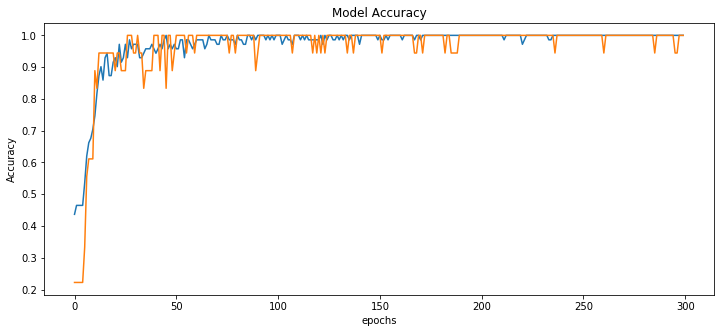

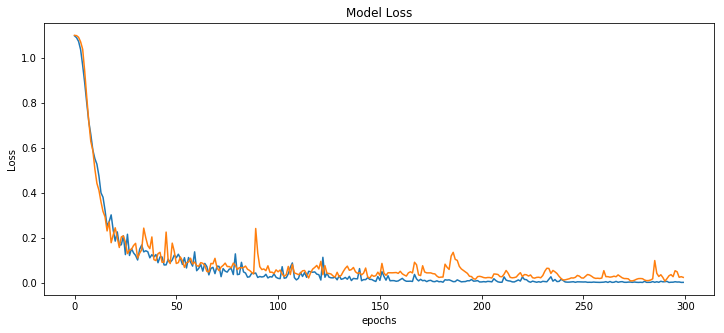

In [117]:
display()

In [118]:
predict = model.predict(X_test)
for row in predict:
    row[np.argmax(row)] = 1.0
    for j in row:
        if j != 1.0:
            j = 0

In [119]:
#predict = np.round(predict)
df = pd.DataFrame(predict, columns=['first', 'second', 'third'])


df['class'] = 0
df['class'][df['first'] == 1] = 1
df['class'][df['second'] == 1] = 2
df['class'][df['third'] == 1] = 3

df_out = pd.read_csv('../data/wine/test.tsv', delimiter='\t')
df_out = pd.concat([df_out, df], axis=1)

df_out[["id","class"]].to_csv("../data/wine/output/submission.csv",index=False, header=False)

In [120]:
df_out['class'].value_counts()

1    32
2    31
3    26
Name: class, dtype: int64